2023-07-13 20:50:33,388 :: matplotlib :: matplotlib data path: /Users/hjavedani/Documents/zoish/.venv/lib/python3.10/site-packages/matplotlib/mpl-data
2023-07-13 20:50:33,394 :: matplotlib :: CONFIGDIR=/Users/hjavedani/.matplotlib
2023-07-13 20:50:33,397 :: matplotlib :: interactive is False
2023-07-13 20:50:33,397 :: matplotlib :: platform is darwin
2023-07-13 20:50:33,451 :: matplotlib :: CACHEDIR=/Users/hjavedani/.matplotlib
2023-07-13 20:50:33,454 :: matplotlib.font_manager :: Using fontManager instance from /Users/hjavedani/.matplotlib/fontlist-v330.json
2023-07-13 20:50:34,361 :: dev :: Single Shap Feature Selector has started !
2023-07-13 20:50:34,361 :: dev :: Single Shap Feature Selector has started !


`use_label_encoder` is deprecated in 1.7.0.


[ 5 14  0  2 17 11  1 13 18  6 16 10  8 19  7 12 15  4  3  9]
Model score: 0.905
2023-07-13 20:50:34,910 :: matplotlib.pyplot :: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-07-13 20:50:34,913 :: matplotlib.pyplot :: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-07-13 20:50:34,917 :: matplotlib.font_manager :: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-07-13 20:50:34,918 :: matplotlib.font_manager :: findfont: score(FontEntry(fname='/Users/hjavedani/Documents/zoish/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-07-13 20:50:34,919 :: matplotlib.font_manager :: findfont: score(FontEntry(fname='/Users/hjavedani/Documents/zoish/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', na

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


2023-07-13 20:50:35,532 :: matplotlib.font_manager :: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
2023-07-13 20:50:35,532 :: matplotlib.font_manager :: findfont: score(FontEntry(fname='/Users/hjavedani/Documents/zoish/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-07-13 20:50:35,533 :: matplotlib.font_manager :: findfont: score(FontEntry(fname='/Users/hjavedani/Documents/zoish/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-07-13 20:50:35,534 :: matplotlib.font_manager :: findfont: score(FontEntry(fname='/Users/hjavedani/Documents/zoish/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu San

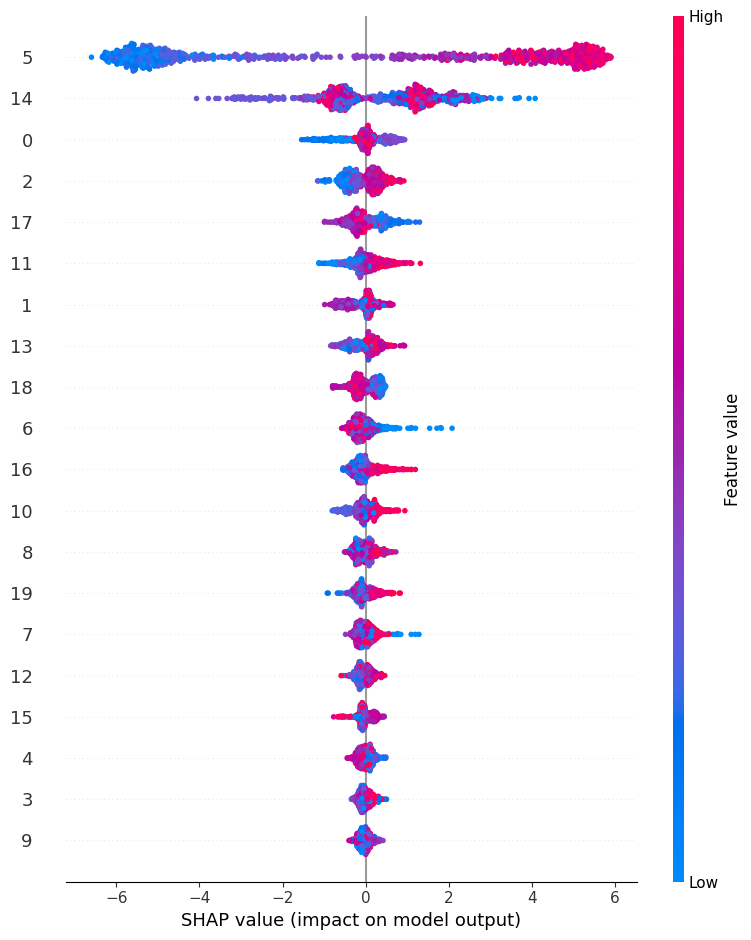

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from zoish.feature_selectors.shap_selectors import *



X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)
selector = ShapFeatureSelector(model=model, num_features=10)
selector.fit(X_train, y_train)

# Transform the training data
X_train_transformed = selector.transform(X_train)

# Re-train your model on the transformed data
model.fit(X_train_transformed, y_train)

# Now you can make predictions using transformed data
X_test_transformed = selector.transform(X_test)
y_pred = model.predict(X_test_transformed)
print(f"Model score: {selector.score(X_test, y_test)}")

# Plot the feature importance
factory = ShapPlotFeatures(selector , type_of_plot="summary_plot")
factory.summary_plot()







